In [3]:
from utils.train import train_model, main, get_param_dict
from utils.utils import accuracy
from model import SSD300
from datasets import PascalVOCDataset, MSCoCoDataset
from config import Config
import torch
import time
print(torch.__version__)

2.0.1+cu118


## Загрузка датасета формате PascalVOC или MSCoCo

In [6]:
data_folder = r'C:\Users\maxxx\MMCP\ssd_torch\a-PyTorch-Tutorial-to-Object-Detection\data'
# ####data_folder = r'C:\Users\maxxx\fiftyone\coco-2017\validation'
# data_folder = r'C:\Users\maxxx\MMCP\FiftyOne_test\HRSID'
# data_folder = r'C:\Users\maxxx\MMCP\FiftyOne_test\coco2017'

DataSetType = 'PascalVOC'      # 'MSCOCO'  or 'PascalVOC'

C:\Users\maxxx\MMCP\ssd_torch\obd\datasets\datasets.py:53: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  boxes = boxes[1 - difficulties]
C:\Users\maxxx\MMCP\ssd_torch\obd\datasets\datasets.py:54: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  labels = labels[1 - difficulties]
C:\Users\maxxx\MMCP\ssd_torch\obd\datasets\datasets.py:55: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  difficulties = difficulties[1 - difficulties]
Cli

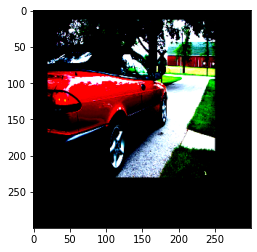

In [7]:
if DataSetType == 'MSCOCO':
    Config.set_labels(DataSetType = 'MSCOCO', path_to_labels_json=f'{data_folder}\labels.json')
    train_dataset = MSCoCoDataset(data_folder=data_folder, label_file=f'{data_folder}\labels.json', split='train')
    
elif DataSetType == 'PascalVOC':
    train_dataset = PascalVOCDataset(data_folder=data_folder, split='train')
    
n_classes = len(Config.label_map)
train_dataset.show_img(1) #  automatically used augmentation 

## Инициализация модели

In [8]:
lr = 1e-3
momentum = 0.9 
weight_decay = 5e-4

model = SSD300(n_classes=n_classes)
# Initialize the optimizer, with twice the default learning rate for biases, as in the original Caffe repo
biases = list()
not_biases = list()
for param_name, param in model.named_parameters():
    if param.requires_grad:
        if param_name.endswith('.bias'):
            biases.append(param)
        else:
            not_biases.append(param)
optimizer = torch.optim.SGD(params=[{'params': biases, 'lr': 2 * lr}, {'params': not_biases}],
                lr=lr, momentum=momentum, weight_decay=weight_decay)


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Loaded base model.



In [5]:
model.eval()

SSD300(
  (base): VGGBase(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), 

In [9]:
params={'epochs': 10,
         'start_epoch': 0,
         'batch_size': 8,
         'print_freq': 10,
         'save_model_at_end': False,
         'workers': 4,
         'decay_lr_at': [80000, 100000],
         'decay_lr_to': 0.1,
         'grad_clip': None,
         'save_per_step': None
        }
t_start = time.time()
train_model(train_dataset=train_dataset, model=model, optimizer=optimizer, **params)
t_end = time.time()

print(f'time = {t_end - t_start}')

used device = cuda
ep = 0


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Epoch: [0][0/627]	Batch Time 23.724 (23.724)	Data Time 19.287 (19.287)	Loss 23.4147 (23.4147)	
Epoch: [0][10/627]	Batch Time 0.220 (2.356)	Data Time 0.001 (1.755)	Loss 13.6344 (17.3214)	
Epoch: [0][20/627]	Batch Time 0.215 (1.337)	Data Time 0.000 (0.920)	Loss 13.7299 (15.7861)	
Epoch: [0][30/627]	Batch Time 0.215 (0.976)	Data Time 0.000 (0.624)	Loss 13.4888 (15.1411)	
Epoch: [0][40/627]	Batch Time 0.217 (0.791)	Data Time 0.003 (0.472)	Loss 12.9574 (14.6721)	
Epoch: [0][50/627]	Batch Time 0.218 (0.678)	Data Time 0.001 (0.380)	Loss 12.7550 (14.3547)	
Epoch: [0][60/627]	Batch Time 0.219 (0.603)	Data Time 0.002 (0.318)	Loss 12.7271 (14.1012)	
Epoch: [0][70/627]	Batch Time 0.221 (0.549)	Data Time 0.003 (0.273)	Loss 12.0846 (13.8776)	
Epoch: [0][80/627]	Batch Time 0.218 (0.508)	Data Time 0.002 (0.240)	Loss 11.6703 (13.6728)	


KeyboardInterrupt: 

Colab's time = 561.9 sec per 3 epochs 

My time      = 623.3653748035431 sec per 3 epochs

# Detect

In [16]:
from utils.detect import detect
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import os

In [18]:
checkpoint = f'{os.getcwd()}/_models/checkpoint_ssd300.pth.tar' 
checkpoint = torch.load(checkpoint)
model = checkpoint['model']
optimizer = checkpoint['optimizer']

In [19]:
img_path = r'C:\Users\maxxx\MMCP\ssd_torch\a-PyTorch-Tutorial-to-Object-Detection\img\000001.jpg'
original_image = Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')
detect(model, original_image, min_score=0.3, max_overlap=0.1, top_k=200).show()

C:\Users\maxxx\MMCP\ssd_torch\obd\model\model.py:505: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  image_boxes.append(class_decoded_locs[1 - suppress])
C:\Users\maxxx\MMCP\ssd_torch\obd\model\model.py:507: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/IndexingUtils.h:28.)
  image_scores.append(class_scores[1 - suppress])
